In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

swiss = GaussianMixture.symmetric_2D(5,1.0)

gaussian_path = GaussianConditionalProbabilityPath(p_data=swiss, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = NoisePredictorTrainer(path=gaussian_path, model=model)

trainer.train_loop(num_epochs=5000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 1.0274953842163086
In Epoch 1000 we have a loss of 0.5279568433761597
In Epoch 2000 we have a loss of 0.5287032127380371
In Epoch 3000 we have a loss of 0.5411110520362854
In Epoch 4000 we have a loss of 0.5695809721946716


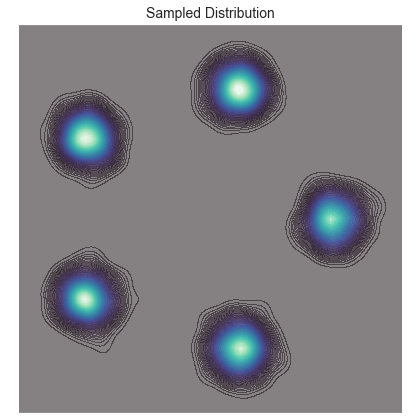

In [3]:
plot_samples(swiss.sample(2000), contour=False)

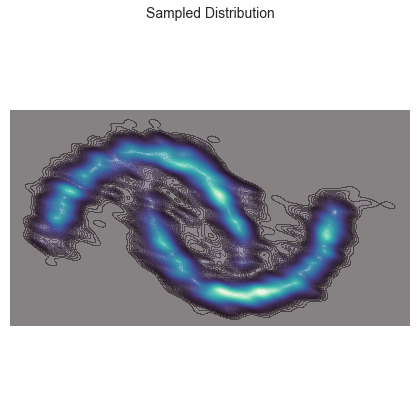

In [7]:
ode = VectorFieldODE(model)

solver = EulerODESolver(ode)

model_sampler = Sampler(solver)

steps= torch.linspace(0.0, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(model_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

swiss = SwissRoll2D(device)

gaussian_path = GaussianConditionalProbabilityPath(p_data=swiss, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="Diffusion", model=model)

trainer.train_loop(num_epochs=5000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 6.192521572113037
In Epoch 1000 we have a loss of 6.639288902282715
In Epoch 2000 we have a loss of 7.17547082901001
In Epoch 3000 we have a loss of 27.52573013305664
In Epoch 4000 we have a loss of 4.13296365737915


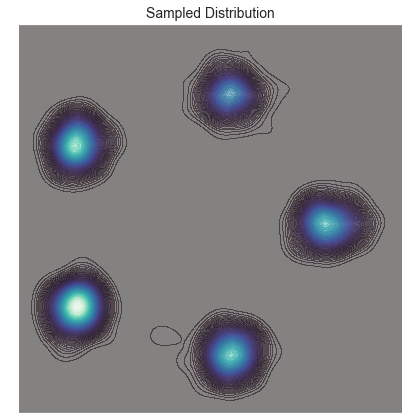

In [4]:
sde = Langevin_Schedule(model, alpha = LinearAlpha(),beta=SquareRootBeta(), sigma=1.5, type = "noise")

solver = EulerSDESolver(sde)

model_sampler = Sampler(solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(model_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)